In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('flight_price_Train.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Summary Statistics

In [7]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observations :-
    
1. Mean is more than median for Price Column.
2. There is large difference between 75% and maximum for Price column. 

# Exploring Target Variable

In [8]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

In [9]:
# As we have continuos values in Price column, so, this is a regression problem.

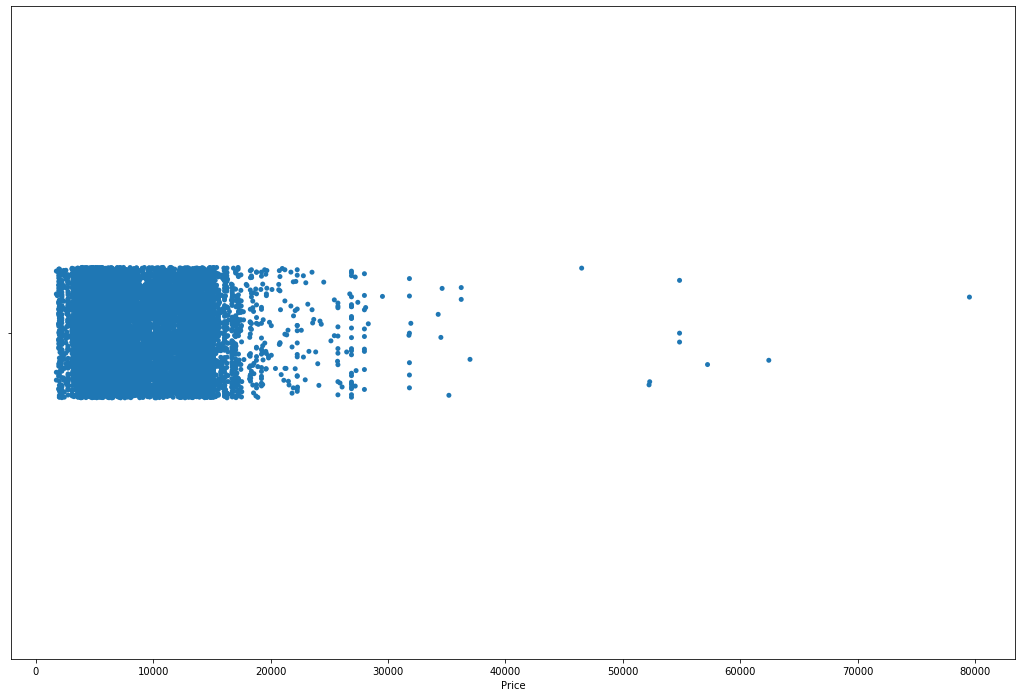

In [10]:
plt.figure(figsize=(18,12))
sns.stripplot(df['Price'])

Observations :-
    
1. Flight Prices are majorly in the range of 200-2000.

# Data Visualizations

To check missing values

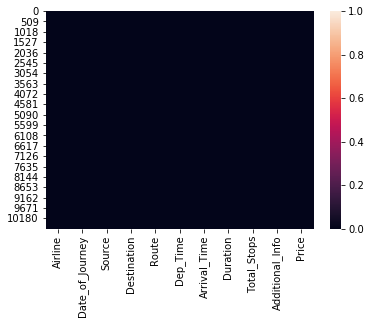

In [11]:
sns.heatmap(df.isnull())

Observations :-

1. There is no missing values in the data.

# Feature Engineering

In [12]:
df['Route1']=df['Route'].str.split('?').str[0]

In [13]:
df['Route1']

0        BLR 
1        CCU 
2        DEL 
3        CCU 
4        BLR 
         ... 
10678    CCU 
10679    CCU 
10680    BLR 
10681    BLR 
10682    DEL 
Name: Route1, Length: 10683, dtype: object

In [14]:
df['Route2']=df['Route'].str.split('?').str[1]

In [15]:
df['Route2']

0          DEL
1         IXR 
2         LKO 
3         NAG 
4         NAG 
         ...  
10678      BLR
10679      BLR
10680      DEL
10681      DEL
10682     GOI 
Name: Route2, Length: 10683, dtype: object

In [16]:
df['Route3']=df['Route'].str.split('?').str[2]
df['Route4']=df['Route'].str.split('?').str[3]
df['Route5']=df['Route'].str.split('?').str[4]

In [17]:
df['Route3']

0          NaN
1         BBI 
2         BOM 
3          BLR
4          DEL
         ...  
10678      NaN
10679      NaN
10680      NaN
10681      NaN
10682     BOM 
Name: Route3, Length: 10683, dtype: object

In [18]:
df['Route4']

0         NaN
1         BLR
2         COK
3         NaN
4         NaN
         ... 
10678     NaN
10679     NaN
10680     NaN
10681     NaN
10682     COK
Name: Route4, Length: 10683, dtype: object

In [19]:
df['Route5']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
10678    NaN
10679    NaN
10680    NaN
10681    NaN
10682    NaN
Name: Route5, Length: 10683, dtype: object

In [20]:
df.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  1
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            1
Additional_Info        0
Price                  0
Route1                 1
Route2                 1
Route3              3492
Route4              9117
Route5             10637
dtype: int64

In [21]:
# Route4 and Route5 columns have more than 50% null values. So, we will drop these columns.
df.drop(['Route4','Route5'],axis=1,inplace=True)

In [22]:
df['Route1']=df['Route1'].fillna(df['Route1'].mode()[0])
df['Route2']=df['Route2'].fillna(df['Route2'].mode()[0])
df['Route3']=df['Route3'].fillna(df['Route3'].mode()[0])

In [23]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]

In [24]:
df['Dep_Hour']

0        22
1        05
2        09
3        18
4        16
         ..
10678    19
10679    20
10680    08
10681    11
10682    10
Name: Dep_Hour, Length: 10683, dtype: object

In [25]:
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [26]:
df['Dep_Minute']

0        20
1        50
2        25
3        05
4        50
         ..
10678    55
10679    45
10680    20
10681    30
10682    55
Name: Dep_Minute, Length: 10683, dtype: object

In [27]:
df['Dep_Hour']=df['Dep_Hour'].astype('int')
df['Dep_Minute']=df['Dep_Minute'].astype('int')

In [28]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [29]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [30]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [31]:
df['Arrival_Hour']=df['Arrival_Hour'].astype('int')
df['Arrival_Minute']=df['Arrival_Minute'].astype('int')

In [32]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')
df['Total_Stops']

0         0 stop
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
10678     0 stop
10679     0 stop
10680     0 stop
10681     0 stop
10682    2 stops
Name: Total_Stops, Length: 10683, dtype: object

In [33]:
# As we have split 'Date_of_Journey','Route','Dep_Time' and 'Arrival_Time' columns. So, we well drop these columns.
df.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time'],axis=1,inplace=True)

In [34]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0 stop,No info,3897,BLR,DEL,COK,22,20,24,03,2019,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,CCU,IXR,BBI,5,50,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,DEL,LKO,BOM,9,25,9,06,2019,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,CCU,NAG,BLR,18,5,12,05,2019,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,BLR,NAG,DEL,16,50,01,03,2019,21,35


In [35]:
df.shape

(10683, 17)

# Bivariate Analysis

In [36]:
print(df['Airline'].value_counts().sort_index())
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])
print(df['Airline'].value_counts().sort_index())

Air Asia                              319
Air India                            1752
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
Name: Airline, dtype: int64
0      319
1     1752
2      194
3     2053
4     3849
5        6
6     1196
7       13
8      818
9        1
10     479
11       3
Name: Airline, dtype: int64


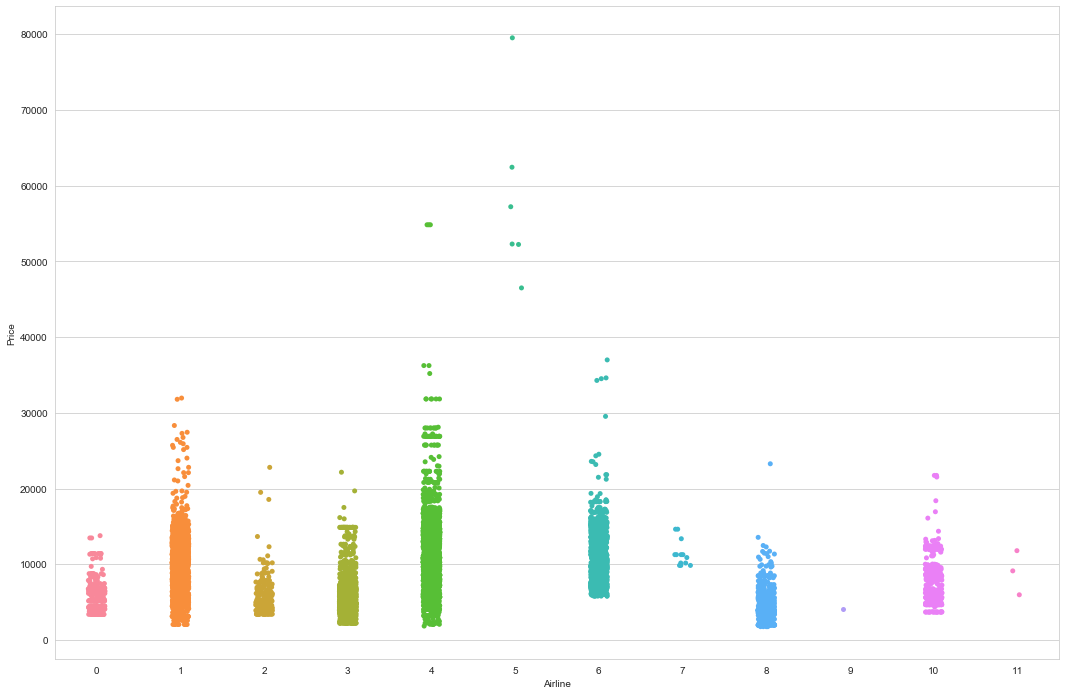

In [37]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Airline',y='Price',data=df)

Observations :-

1. Jet Airways Business has the highest price.
2. Trujet Airlines has the lowest price.
3. Jet Airways, Multiple carriers, Air India, Space Jet and GoAir also have high prices.
4. Air Asia, IndiGo, Multiple carriers Premium economy, Vistara and Vistara Premium economy also have low prices.

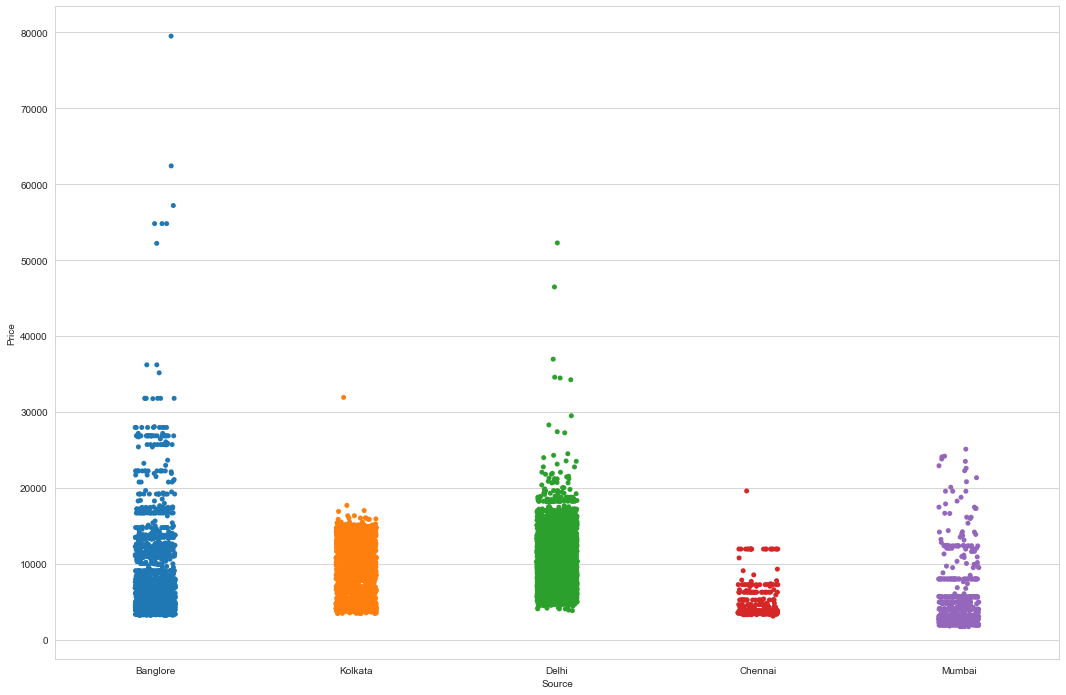

In [38]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Source',y='Price',data=df)

Observations :-
    
1. Flights from Banglore have the highest prices.
2. Flights from Chennai have the lowest prices.
3. Flights from Delhi and Kolkata also have high prices.
4. Flights from Mumbai also have low prices.

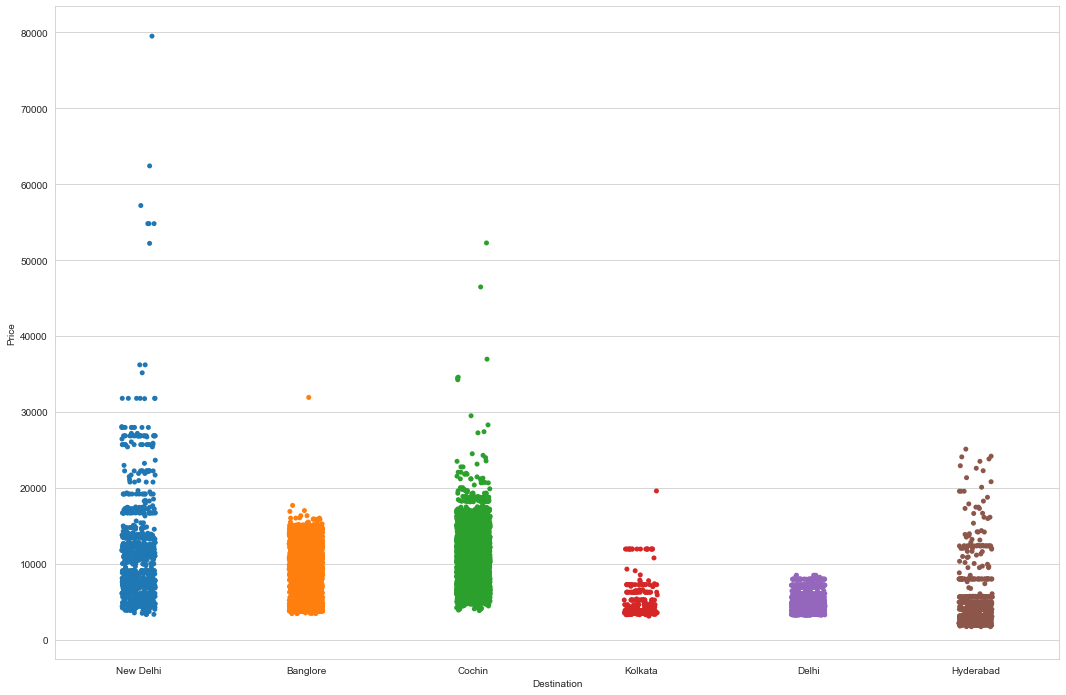

In [39]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Destination',y='Price',data=df)

Observations :-
    
1. Flights with New Delhi as destination have the highest prices.
2. Flights with Delhi as destination have the lowest prices.
3. Flights with Cochin and Banglore as destinations also have high prices.
4. Flights with Hyderabad and Kolkata as destinations also have low prices.

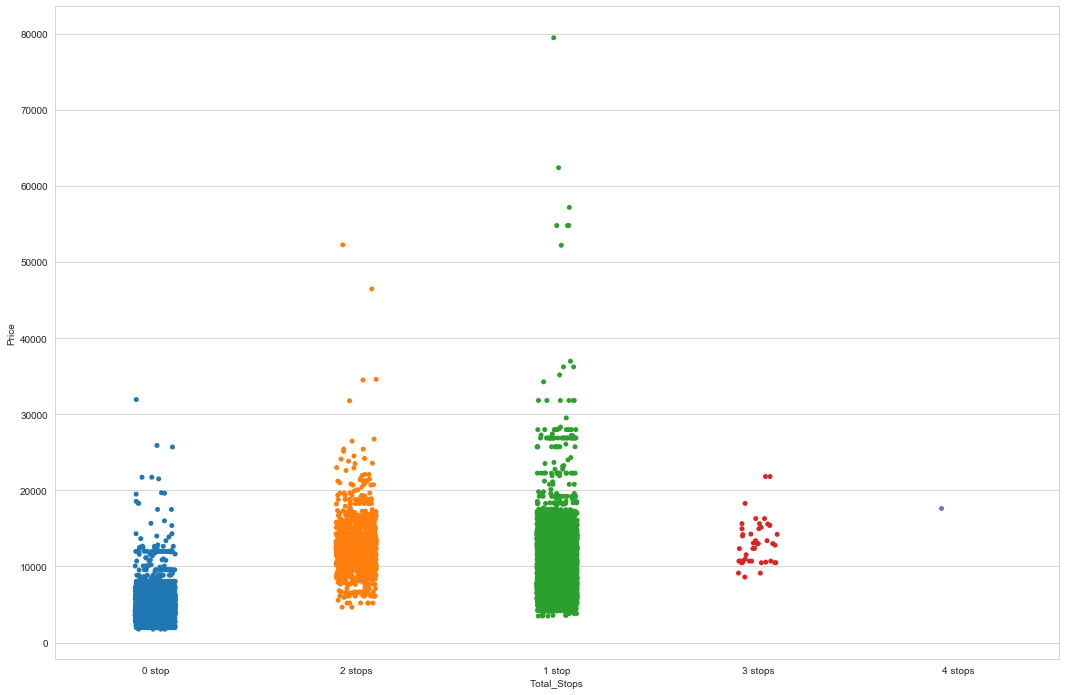

In [40]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Total_Stops',y='Price',data=df)

Observations :-
    
1. Flights which have one stop till destination have the highest prices.
2. Flights which have four stops till destination have the lowest prices.
3. Flights which have two stops till destination also have high prices.
4. Flights which have zero and three stops till destination also have low prices.

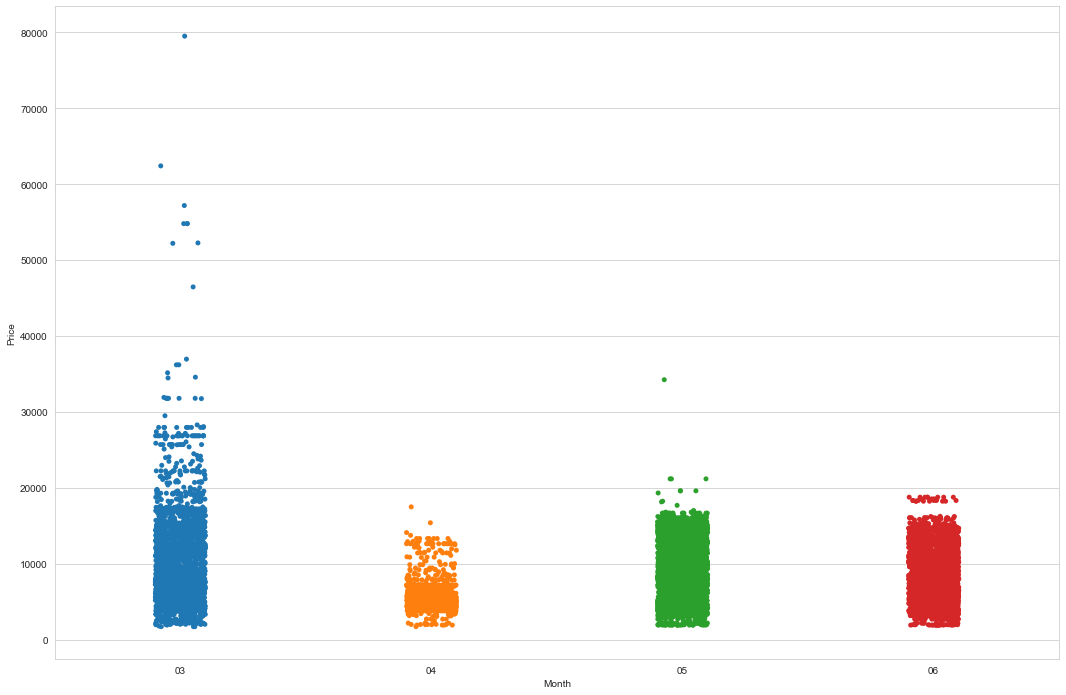

In [41]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Month',y='Price',data=df)

Observations :-
    
1. Flights have the highest prices in the month of March.
2. Flights have the lowest prices  in the month of April .

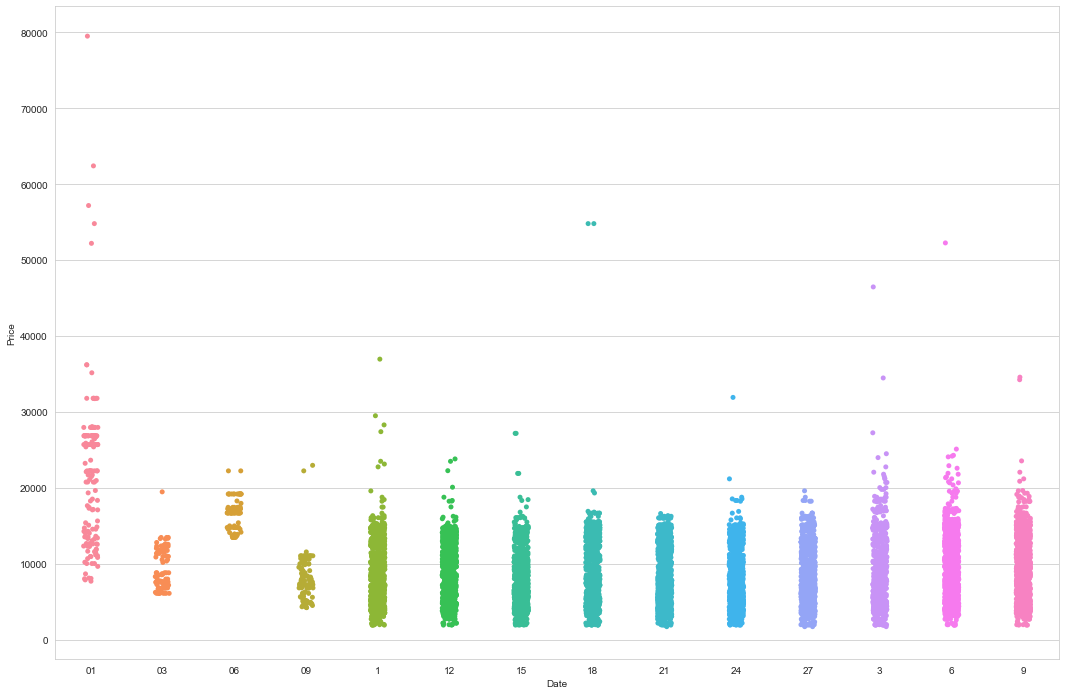

In [42]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Date',y='Price',data=df)

Observations :-
    
1. Flights have the highest prices on the first day of months .
2. Flights have the lowest prices  on 21st day of months .

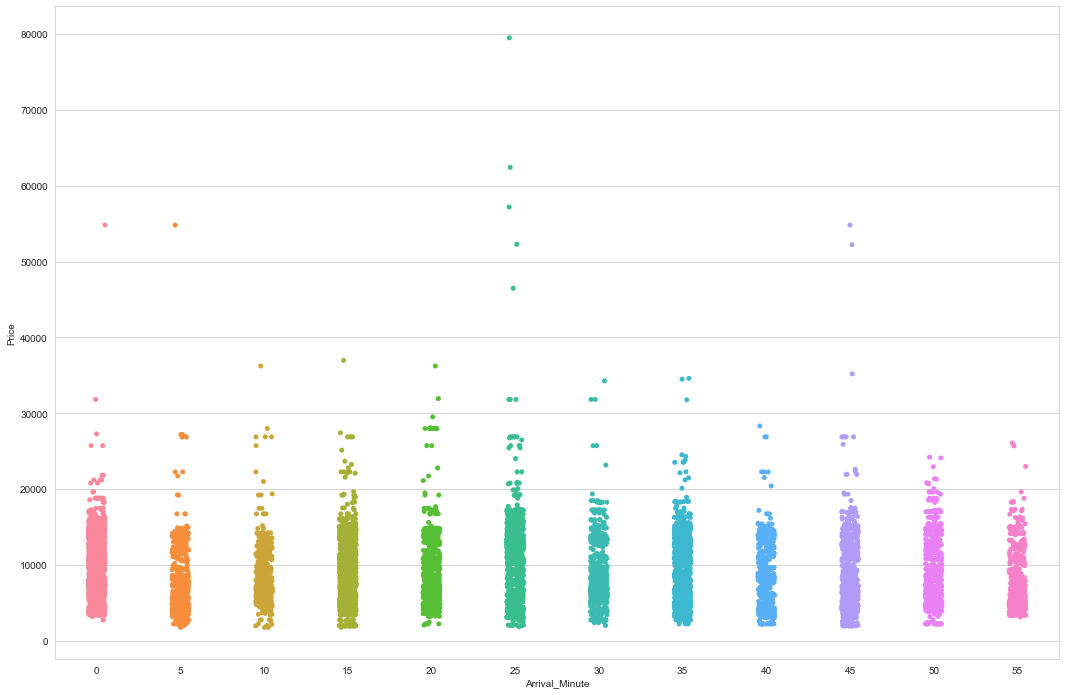

In [43]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Arrival_Minute',y='Price',data=df)

Observations :-

1. Flights which arrived at 25th minute have the highest price.
2. Flights which arrived at 50th minute have the lowest price.
3. Flights which arrived at 0th, 5th and 45th minute have also high prices.
4. Flights which arrived at 40th and 56th minute have also low prices.

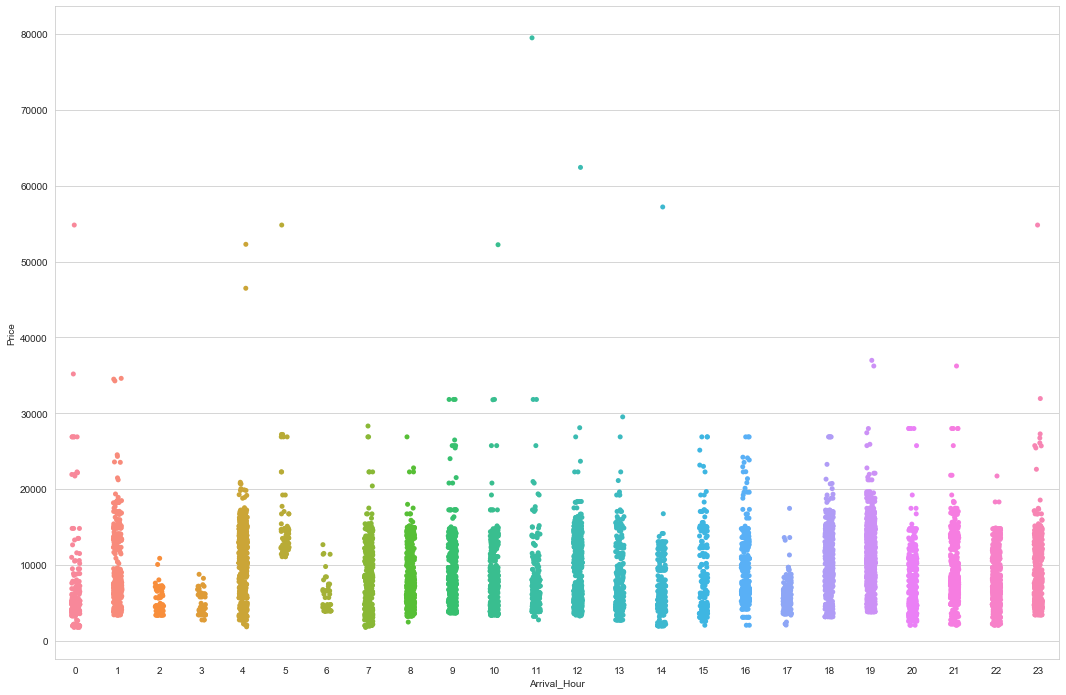

In [44]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Arrival_Hour',y='Price',data=df)

Observations :-
    
1. Flights which arrived at 11 AM have the highest price.
2. Flights which arrived at 3 AM have the lowest price.
3. Flights which arrived at 12 PM, 14 PM, 0 AM, 5 AM, 10 AM, 4 AM and 23 PM have also high prices.
4. Flights which arrived at 2 AM, 6 AM and 17 PM have also low prices.

In [45]:
df['Year'].value_counts()

2019    10683
Name: Year, dtype: int64

In [46]:
# As Year Column has only 1 unique value , i.e, 2019. So, we will drop Year column.
df.drop('Year',axis=1,inplace=True)

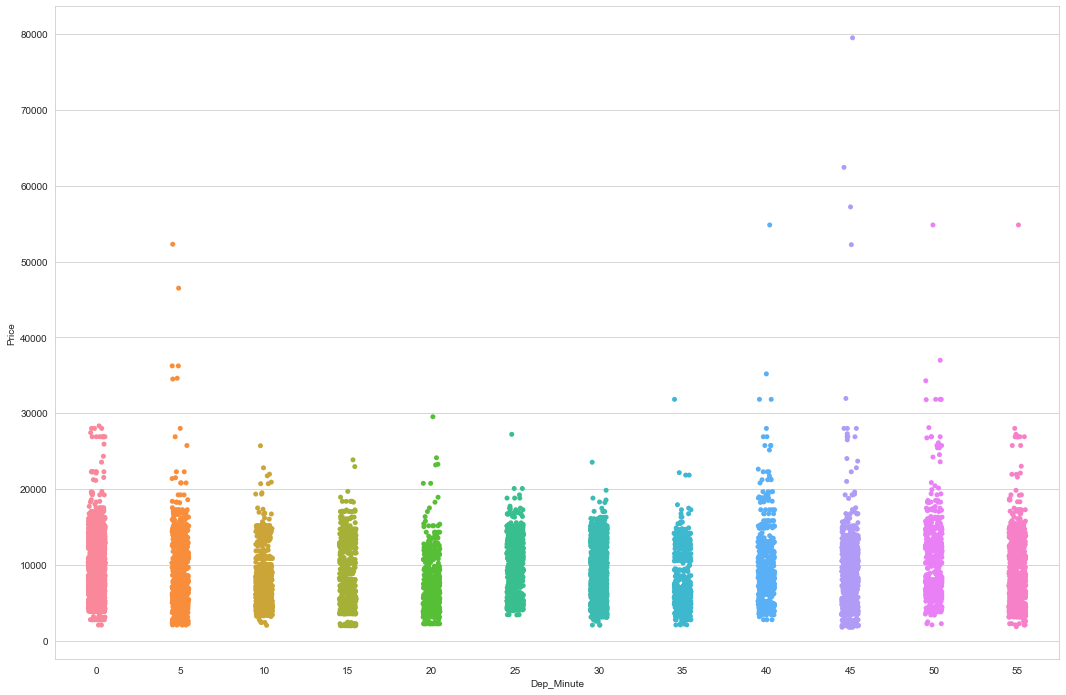

In [47]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Dep_Minute',y='Price',data=df)

Observations :-
    
1. Flights which departed at 45th minute have the highest prices.
2. Flights which departed at 30th minute have the lowest prices.
3. Flights which departed at 40th, 50th, 55th and 5th minute have also high prices.
4. Flights which take 0th, 10th, 15th and 25th minute have also low prices.

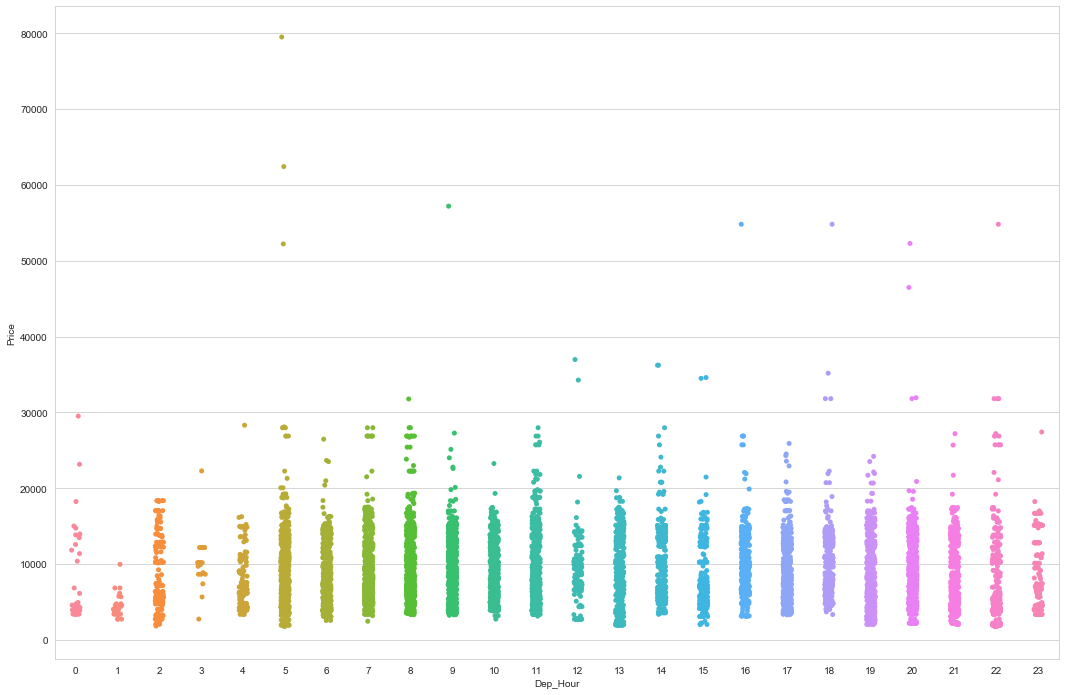

In [48]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Dep_Hour',y='Price',data=df)

Observations :-
    
1. Flights which departed at 5 AM have the highest prices.
2. Flights which departed at 1 AM for departure have the lowest prices.
3. Flights which departed at 9 AM, 16 PM, 18 PM, 20 PM and 22 PM have also high prices.
4. Flights which departed at 3 AM, 10 AM, 12 PM, 13 PM and 15 PM have also low prices.

In [49]:
print(df['Additional_Info'].value_counts().sort_index())

1 Long layover                    19
1 Short layover                    1
2 Long layover                     1
Business class                     4
Change airports                    7
In-flight meal not included     1982
No Info                            3
No check-in baggage included     320
No info                         8345
Red-eye flight                     1
Name: Additional_Info, dtype: int64


In [50]:
df['Additional_Info']=df['Additional_Info'].replace('No info','No Info')

In [51]:
df['Additional_Info'].value_counts().sort_index()

1 Long layover                    19
1 Short layover                    1
2 Long layover                     1
Business class                     4
Change airports                    7
In-flight meal not included     1982
No Info                         8348
No check-in baggage included     320
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])
print(df['Additional_Info'].value_counts().sort_index())

0      19
1       1
2       1
3       4
4       7
5    1982
6    8348
7     320
8       1
Name: Additional_Info, dtype: int64


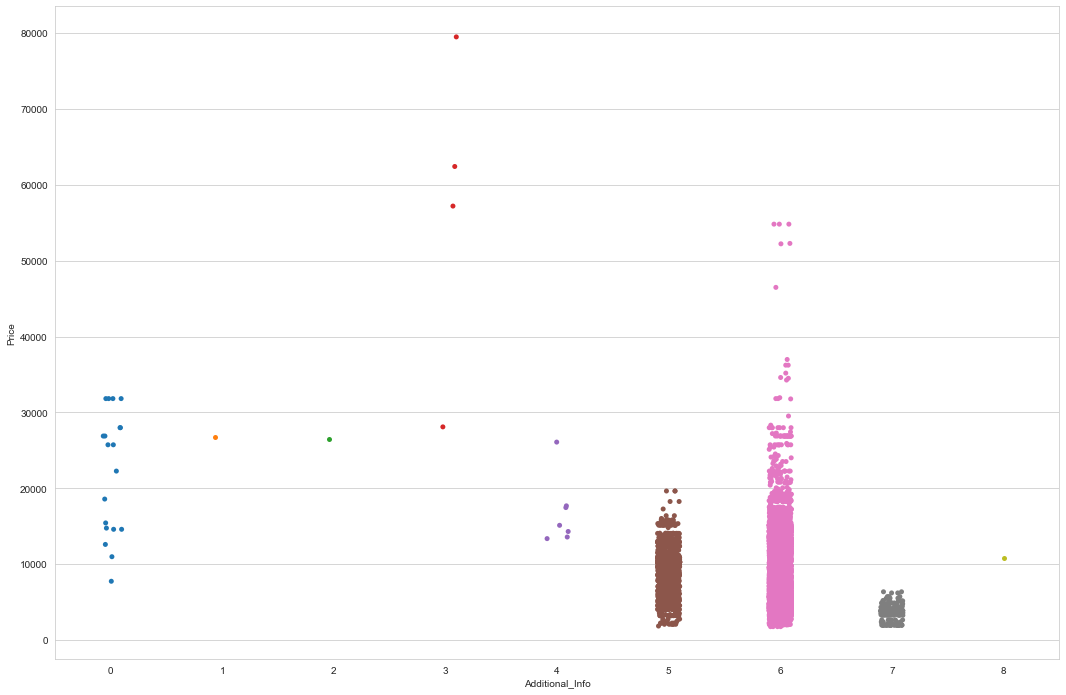

In [53]:
plt.figure(figsize=(18,12))
sns.set_style('whitegrid')
sns.stripplot(x='Additional_Info',y='Price',data=df)

Observations :-
    
1. Flights with additional info of Business class have the highest prices.
2. Flights with additional info of 'No check-in baggage included' have the lowest prices.
3. Flights with additional info of 'No info' also have high prices.
4. Flights with additional info of 'Red-eye flight' also have low prices.

In [54]:
df['Duration_Hours']=df['Duration'].str.split('h').str[0]

In [55]:
df['Duration_Hours'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
36       7
35       7
31       6
47       2
42       2
39       2
41       1
5m       1
40       1
Name: Duration_Hours, dtype: int64

In [56]:
df['Duration_Hours']=df['Duration_Hours'].replace('5m','0')

In [57]:
df['Duration_Minutes']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [58]:
df['Duration_Minutes'].value_counts()

30    1446
20     997
50     972
35     939
55     910
15     903
45     896
25     803
40     637
5      623
10     525
Name: Duration_Minutes, dtype: int64

In [59]:
df['Duration_Minutes']=df['Duration_Minutes'].fillna(df['Duration_Minutes'].mode()[0])

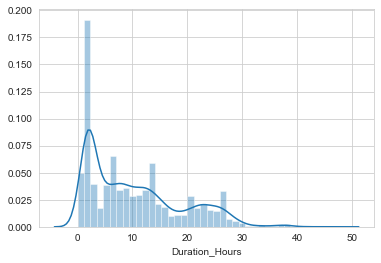

In [60]:
sns.distplot(df['Duration_Hours'])

Observations :-
    
1. Majorly duration of flights is in the range of 0-5 hours.

In [61]:
df['Duration_Minutes']=df['Duration_Minutes'].astype('int32')

In [62]:
df['Duration_Hours']=df['Duration_Hours'].astype('int32')

In [63]:
# As we have split Duration into Duration_Hours and Duration_Minutes columns. So, we have dropped Duration column.
df.drop('Duration',axis=1,inplace=True)

In [64]:
df.dtypes

Airline              int32
Source              object
Destination         object
Total_Stops         object
Additional_Info      int32
Price                int64
Route1              object
Route2              object
Route3              object
Dep_Hour             int32
Dep_Minute           int32
Date                object
Month               object
Arrival_Hour         int32
Arrival_Minute       int32
Duration_Hours       int32
Duration_Minutes     int32
dtype: object

In [65]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,Banglore,New Delhi,0 stop,6,3897,BLR,DEL,COK,22,20,24,03,1,10,2,50
1,1,Kolkata,Banglore,2 stops,6,7662,CCU,IXR,BBI,5,50,1,05,13,15,7,25
2,4,Delhi,Cochin,2 stops,6,13882,DEL,LKO,BOM,9,25,9,06,4,25,19,30
3,3,Kolkata,Banglore,1 stop,6,6218,CCU,NAG,BLR,18,5,12,05,23,30,5,25
4,3,Banglore,New Delhi,1 stop,6,13302,BLR,NAG,DEL,16,50,01,03,21,35,4,45


In [66]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)
        
df_str_types

['Source',
 'Destination',
 'Total_Stops',
 'Route1',
 'Route2',
 'Route3',
 'Date',
 'Month']

In [67]:
#for i in df_str_types:
#    print(df_str_types[i].value_counts())    
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts())

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64
1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64
1    5625
0    3491
2    1520
3      45
5       1
4       1
Name: Total_Stops, dtype: int64
3    4537
2    2871
0    2197
1     697
4     381
Name: Route1, dtype: int64
7     3868
13    1552
5      724
14     663
19     621
20     565
8      381
0      263
28     260
33     259
6      236
10     213
2      114
21     106
15      88
34      83
9       75
16      72
37      66
32      61
4       57
25      52
29      41
1       40
3       38
23      21
41      19
38      19
40      18
11      16
42      15
24      13
26      12
43      11
31      10
36      10
17       8
18       3
12       3
39       2
27       1
44       1
22       1
30       1
35       1
Name: Route2, dtype: int64
6     6677
3     1834
4     1088
8      562
9      120
22      85
7       72
13      44
0       35
23      27
11      16
15      15
1       

In [68]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,0,6,3897,0,13,6,22,20,9,0,1,10,2,50
1,1,3,0,2,6,7662,2,25,1,5,50,4,2,13,15,7,25
2,4,2,1,2,6,13882,3,32,4,9,25,13,3,4,25,19,30
3,3,3,0,1,6,6218,2,34,3,18,5,5,2,23,30,5,25
4,3,0,5,1,6,13302,0,34,8,16,50,0,0,21,35,4,45


In [69]:
dfcorr=df.corr()
dfcorr

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.013401,0.018479,-0.199754,0.090542,-0.039520,0.035209,-0.061335,-0.088782,-0.035194,-0.060044,0.025603,0.024643,-0.007491,-0.071089,-0.158285,-0.025903
Source,-0.013401,1.000000,-0.592574,0.192519,0.008037,0.015998,0.437882,0.035844,-0.222425,0.059044,-0.056991,0.187035,0.183268,0.025632,0.021040,0.166109,-0.236007
Destination,0.018479,-0.592574,1.000000,-0.295118,0.015893,-0.071112,-0.483347,0.077902,0.342238,-0.072979,0.127892,-0.291701,-0.364686,-0.039710,0.017196,-0.258459,0.060149
Total_Stops,-0.199754,0.192519,-0.295118,1.000000,-0.160990,0.602614,0.428609,0.161613,0.049105,-0.061716,-0.001979,0.050416,0.054431,0.037704,-0.106738,0.739384,-0.138480
Additional_Info,0.090542,0.008037,0.015893,-0.160990,1.000000,-0.191652,0.017198,0.059880,0.078815,-0.043038,0.001707,0.050324,-0.016230,-0.019475,0.028698,-0.217952,0.038096
Price,-0.039520,0.015998,-0.071112,0.602614,-0.191652,1.000000,0.182135,-0.087218,-0.023031,0.006819,-0.024492,-0.069569,-0.103651,0.024264,-0.086155,0.508672,-0.112485
Route1,0.035209,0.437882,-0.483347,0.428609,0.017198,0.182135,1.000000,-0.083703,-0.126576,-0.044459,-0.073887,0.275433,0.230668,0.015846,-0.172988,0.296887,-0.290499
Route2,-0.061335,0.035844,0.077902,0.161613,0.059880,-0.087218,-0.083703,1.000000,0.063087,-0.126174,0.091510,0.004145,0.048393,-0.012187,0.045965,0.035053,0.040568
Route3,-0.088782,-0.222425,0.342238,0.049105,0.078815,-0.023031,-0.126576,0.063087,1.000000,-0.130614,0.052528,-0.062736,-0.207610,-0.004233,0.005244,-0.038493,-0.013463
Dep_Hour,-0.035194,0.059044,-0.072979,-0.061716,-0.043038,0.006819,-0.044459,-0.126174,-0.130614,1.000000,-0.024806,-0.005157,0.039112,0.005215,0.067909,0.002783,-0.028792


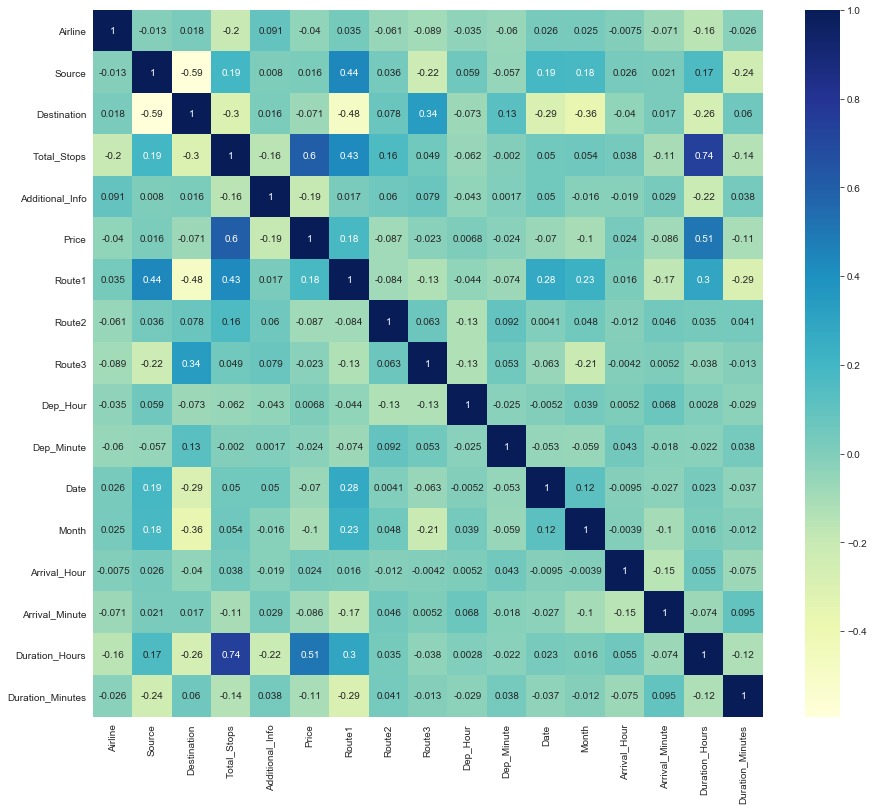

In [70]:
# Multivariate Analysis
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

Observations :-

1. Price is highly positively correlated to Total_Stops.
2. Total_Stops is highlly negatively correlated to Destination.
3. Destination is highly positively correlated to Route3.
4. Route3 is highly negatively correlated to Price.

# Plotting Outliers

Airline                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Source               AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Destination          AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Total_Stops          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Additional_Info      AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Price                AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Route1               AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Route2               AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Route3                 AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Dep_Hour            AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Dep_Minute          AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Date                AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
Month               AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
Arrival_Hour        AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Arrival_Minute      AxesSubplot(0.

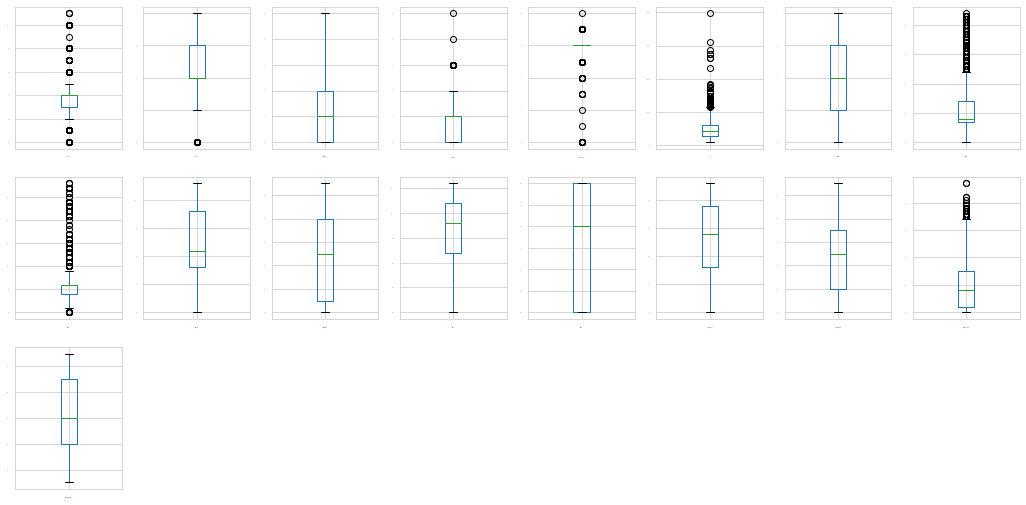

In [71]:
df.plot(kind='box',subplots=True,layout=(4,8),sharex=False,fontsize=1,figsize=(18,12))

Observations :-

1. Airline, Source, Total Stops Additional_Info, Route2, Route3, Duration_Hours and Price have outliers

# Removing Outliers

In [72]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,3,0,5,0,6,3897,0,13,6,22,20,9,0,1,10,2,50
1,1,3,0,2,6,7662,2,25,1,5,50,4,2,13,15,7,25
2,4,2,1,2,6,13882,3,32,4,9,25,13,3,4,25,19,30
3,3,3,0,1,6,6218,2,34,3,18,5,5,2,23,30,5,25
4,3,0,5,1,6,13302,0,34,8,16,50,0,0,21,35,4,45


In [73]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [74]:
z

array([[0.41067545, 1.65844074, 2.41666505, ..., 0.8900573 , 0.97069753,
        1.32262466],
       [1.26099927, 0.89005213, 0.97382594, ..., 0.58712363, 0.38211718,
        0.43855588],
       [0.01448647, 0.04055451, 0.29572775, ..., 0.01874372, 1.03047566,
        0.08631977],
       ...,
       [0.01448647, 1.65844074, 0.38237045, ..., 0.28418995, 0.85298146,
        0.08631977],
       [2.56545795, 1.65844074, 2.41666505, ..., 0.8900573 , 0.97069753,
        0.61815244],
       [1.26099927, 0.04055451, 0.29572775, ..., 0.58712363, 0.26440111,
        0.79079199]])

In [75]:
threshold=3
print(np.where(z>3))

(array([   16,   123,   164,   185,   191,   226,   249,   289,   291,
         304,   307,   365,   396,   402,   402,   402,   458,   470,
         482,   486,   510,   514,   520,   553,   596,   597,   628,
         657,   673,   720,   785,   785,   799,   805,   826,   853,
         865,   877,   919,   919,   932,   936,   946,   959,   961,
         966,   969,   972,   975,   992,  1010,  1014,  1043,  1067,
        1079,  1113,  1138,  1149,  1185,  1196,  1203,  1211,  1218,
        1218,  1218,  1246,  1321,  1327,  1336,  1339,  1341,  1346,
        1353,  1369,  1386,  1417,  1424,  1442,  1462,  1466,  1478,
        1496,  1538,  1551,  1558,  1571,  1591,  1596,  1605,  1625,
        1628,  1629,  1629,  1654,  1657,  1665,  1679,  1712,  1756,
        1785,  1791,  1798,  1804,  1862,  1918,  1949,  1956,  1966,
        2027,  2055,  2079,  2099,  2108,  2151,  2172,  2172,  2172,
        2172,  2185,  2205,  2209,  2248,  2343,  2349,  2360,  2374,
        2402,  2405

In [76]:
df_new=df[(z<3).all(axis=1)]

In [77]:
df_new.shape

(10186, 17)

In [78]:

df.shape

(10683, 17)

In [79]:

df=df_new

In [80]:

((10683-10186)/10683)*100


4.652251240288308

In [81]:
# 4% of data is removed as outliers.

# To check Skewness

In [82]:
df.shape

(10186, 17)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FACAD22A48>,
      dtype=object)

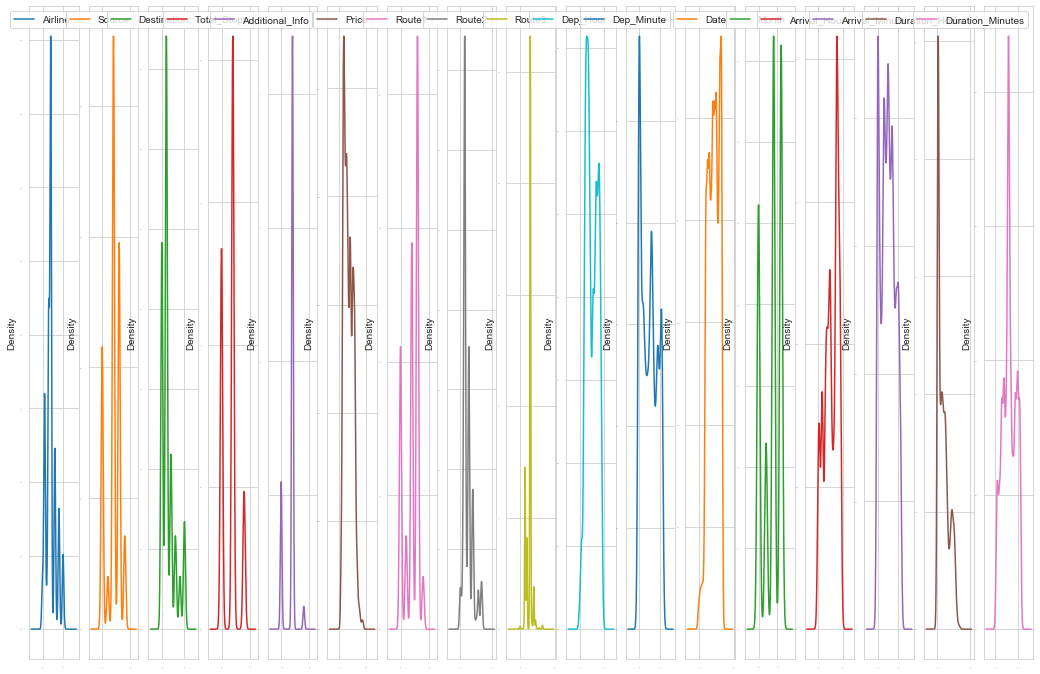

In [83]:
df.plot(kind='density',subplots=True,layout=(1,17),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Airline, Route2 and Destination are right skewed.
2. Additional_Info and Route1 are left skewed.

In [84]:
df.skew()

Airline             0.733786
Source             -0.437004
Destination         1.262598
Total_Stops         0.244700
Additional_Info    -0.722166
Price               0.417545
Route1             -0.622563
Route2              1.320473
Route3              0.111634
Dep_Hour            0.076488
Dep_Minute          0.177795
Date               -0.227148
Month              -0.439829
Arrival_Hour       -0.374228
Arrival_Minute      0.098920
Duration_Hours      0.784487
Duration_Minutes   -0.018619
dtype: float64

In [85]:
df_rs=[ 'Destination','Airline','Route2']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [86]:
df.skew()

Airline            -0.527406
Source             -0.437004
Destination         0.012029
Total_Stops         0.244700
Additional_Info    -0.722166
Price               0.417545
Route1             -0.622563
Route2              0.120691
Route3              0.111634
Dep_Hour            0.076488
Dep_Minute          0.177795
Date               -0.227148
Month              -0.439829
Arrival_Hour       -0.374228
Arrival_Minute      0.098920
Duration_Hours      0.784487
Duration_Minutes   -0.018619
dtype: float64

In [87]:
df_rs=[ 'Additional_Info','Route1']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.cbrt(df[val])

In [88]:
df.skew()

Airline            -0.527406
Source             -0.437004
Destination         0.012029
Total_Stops         0.244700
Additional_Info    -0.722166
Price               0.417545
Route1             -0.622563
Route2              0.120691
Route3              0.111634
Dep_Hour            0.076488
Dep_Minute          0.177795
Date               -0.227148
Month              -0.439829
Arrival_Hour       -0.374228
Arrival_Minute      0.098920
Duration_Hours      0.784487
Duration_Minutes   -0.018619
dtype: float64

In [89]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

# Train Test Split

In [90]:
x=df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes']]

y=df['Price']

In [91]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,1.732051,0,2.236068,0,6,0,3.605551,6,22,20,9,0,1,10,2,50
1,1.000000,3,0.000000,2,6,2,5.000000,1,5,50,4,2,13,15,7,25
2,2.000000,2,1.000000,2,6,3,5.656854,4,9,25,13,3,4,25,19,30
3,1.732051,3,0.000000,1,6,2,5.830952,3,18,5,5,2,23,30,5,25
4,1.732051,0,2.236068,1,6,0,5.830952,8,16,50,0,0,21,35,4,45


# Scaling of Data

In [92]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [93]:
x

array([[-0.25389926, -1.67674843,  1.83891762, ..., -0.88138256,
        -0.96545472,  1.31264807],
       [-1.38113303,  0.87863926, -1.37656456, ..., -0.58016589,
        -0.3513441 , -0.4496138 ],
       [ 0.15869694,  0.02684336,  0.06144279, ...,  0.02226744,
         1.12252138, -0.09716142],
       ...,
       [ 0.15869694, -1.67674843,  0.65708494, ..., -0.27894923,
        -0.8426326 , -0.09716142],
       [ 1.94840692, -1.67674843,  1.83891762, ..., -0.88138256,
        -0.96545472,  0.60774332],
       [-1.38113303,  0.02684336,  0.06144279, ..., -0.58016589,
        -0.22852198, -0.80206617]])

In [94]:
x=pd.DataFrame(x)

In [95]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.253899,-1.676748,1.838918,-1.208118,0.368334,-1.691375,0.373059,0.379597,1.634694,-0.227558,0.163445,-1.523209,-1.793832,-0.881383,-0.965455,1.312648
1,-1.381133,0.878639,-1.376565,1.883425,0.368334,-0.023901,1.674961,-2.869627,-1.321525,1.369714,-1.434608,0.219704,-0.049866,-0.580166,-0.351344,-0.449614
2,0.158697,0.026843,0.061443,1.883425,0.368334,0.809837,2.288221,-0.920092,-0.625944,0.038654,1.441888,1.091160,-1.357840,0.022267,1.122521,-0.097161
3,-0.253899,0.878639,-1.376565,0.337654,0.368334,-0.023901,2.450764,-1.569937,0.939113,-1.026194,-1.114997,0.219704,1.403440,0.323484,-0.596988,-0.449614
4,-0.253899,-1.676748,1.838918,0.337654,0.368334,-1.691375,2.450764,1.679287,0.591322,1.369714,-2.713050,-1.523209,1.112779,0.624701,-0.719810,0.960196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,-2.920963,0.878639,-1.376565,-1.208118,0.368334,-0.023901,-0.905534,0.379597,1.113008,1.635926,1.441888,-0.651753,1.258109,0.022267,-0.965455,-0.097161
10182,-1.381133,0.878639,-1.376565,-1.208118,0.368334,-0.023901,-0.905534,0.379597,1.286903,1.103502,0.483056,-0.651753,1.403440,-0.278949,-0.965455,0.255291
10183,0.158697,-1.676748,0.657085,-1.208118,0.368334,-1.691375,0.373059,0.379597,-0.799840,-0.227558,0.483056,-0.651753,-0.340527,-0.278949,-0.842633,-0.097161
10184,1.948407,-1.676748,1.838918,-1.208118,0.368334,-1.691375,0.373059,0.379597,-0.278154,0.304866,-2.713050,-1.523209,0.095465,-0.881383,-0.965455,0.607743


In [96]:
x.columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes']

# Algorithms

In [97]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.5165205960311918
error:
Mean absolute error: 2207.581400054838
Mean squared error: 8048787.394006424
Root Mean squared error: 2837.038490046694
0.533173693060988
error:
Mean absolute error: 2141.509470903275
Mean squared error: 7445443.443682671
Root Mean squared error: 2728.633988588919
0.5242029634499535
error:
Mean absolute error: 2209.1661170789216
Mean squared error: 8019357.237202931
Root Mean squared error: 2831.846965710353
0.5220405126927254
error:
Mean absolute error: 2142.493951734055
Mean squared error: 7714148.734501079
Root Mean squared error: 2777.4356400286
0.5565037171236393
error:
Mean absolute error: 2143.175848394539
Mean squared error: 7462803.003944591
Root Mean squared error: 2731.813134887632
0.5481776178061133
error:
Mean absolute error: 2119.809739320033
Mean squared error: 7244731.064689443
Root Mean squared error: 2691.6038090122856
0.5312601119719855
error:
Mean absolute error: 2214.6433022906194
Mean squared error: 7921120.082670284
Root Mean squared err

Best accuracy is 56.534 on Random_state 168

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=168)
lm=LinearRegression()
lm.fit(x_train,y_train)
predlm=lm.predict(x_test)
r2score=r2_score(y_test,predlm)
print(r2_score(y_test,predlm))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predlm))
mean_squared_error_lm=mean_squared_error(y_test,predlm)
print('Mean squared error:',mean_squared_error_lm)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5653447414270105
error:
Mean absolute error: 2116.701571478078
Mean squared error: 7345503.431029189
Root Mean squared error: 5007.717171228465


In [99]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
mean_squared_error_dtr=mean_squared_error(y_test,preddtr)
print('Mean squared error:',mean_squared_error_dtr)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.8872637361996474
error:
Mean absolute error: 619.3500669344043
Mean squared error: 1905198.6516064256
Root Mean squared error: 1380.2893361923889


In [100]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
mean_squared_error_knn=mean_squared_error(y_test,predknn)
print('Mean squared error:',mean_squared_error_knn)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.818589425959712
error:
Mean absolute error: 1074.4235609103077
Mean squared error: 3065767.5658009816
Root Mean squared error: 1750.933341335695


In [101]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
mean_squared_error_svr=mean_squared_error(y_test,predsvr)
print('Mean squared error:',mean_squared_error_svr)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

0.05583246127157793
error:
Mean absolute error: 3312.8367013559805
Mean squared error: 15956061.173550451
Root Mean squared error: 3994.5038707642343


In [102]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [103]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.5653447406178751
error:
Mean absolute error: 2116.7015674683053
Mean squared error: 7345503.44470326
Mean squared error: 7345503.44470326
Root Mean squared error: 2710.258925767658


In [104]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.5653447407824443
error:
Mean absolute error: 2116.7015734423067
Mean squared error: 7345503.441922104
Root Mean squared error: 2710.2589252545786


In [105]:
el=ElasticNet(alpha=.0001)
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
r2score=r2_score(y_test,predel)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predel))
mean_squared_error_el=mean_squared_error(y_test,predel)
print('Mean squared error:',mean_squared_error_el)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predel)))

0.5653447406178751
error:
Mean absolute error: 2116.709371960483
Mean squared error: 7345546.746931081
Root Mean squared error: 2710.266914333546


In [106]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9317891756927302
error:
Mean absolute error: 557.8604652791058
Mean squared error: 1152736.1836765674
Root Mean squared error: 1073.65552374892


In [107]:
from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2score=r2_score(y_test,predad)
print(r2_score(y_test,predad))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predad))
mean_squared_error_ad=mean_squared_error(y_test,predad)
print('Mean squared error:',mean_squared_error_ad)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predad)))

0.6773103653032528
error:
Mean absolute error: 1869.6154012047557
Mean squared error: 5453328.291953649
Root Mean squared error: 2335.2362390031653


Random Forest Regressor is the best algorithm.

# Cross Validation Score

In [108]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.93119744 0.93536707 0.92544666 0.92614637 0.92319378]
0.9282702621470715 0.0044087943238027725


In [109]:
list1=[0.931788871514106]
list2=[0.8807800482250466]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)

In [110]:
difference

[0.051008823289059424]

As the difference between accuracy scores and cross validation scores of Random Forest Regressor is only 0.05 %. So, It is verified that Random Forest Regressor is the best algorithm for this model with accuracy of 93.178 %.

# Hyper Parameter Tuning

In [111]:
rf=RandomForestRegressor()
grid_param={
 'max_depth': [ 100, 200,300],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [100, 200, 300],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='accuracy')

In [112]:
gd_sr.best_params_

{'max_depth': 100, 'max_features': 'auto', 'min_samples_leaf': 1}

In [113]:
rf=RandomForestRegressor(max_depth= 100, max_features='auto', min_samples_leaf= 1)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9321446267440548
error:
Mean absolute error: 554.5977785816989
Mean squared error: 1146729.2002901465
Root Mean squared error: 1070.8544253492846


Accuracy of Random Forest Regressor has changed from 93.178 % to 93.214 % with hyper parameter tuning.

# Cleaning Test Dataset

In [114]:
df=pd.read_csv('Flight_Test.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [115]:
df.shape

(2671, 10)

In [116]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [117]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Data Visualizations

To check missing values

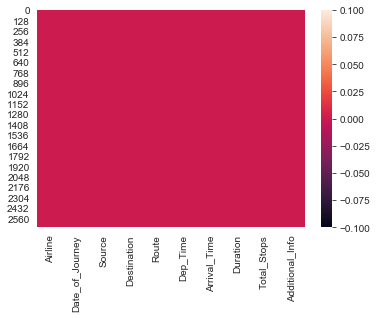

In [119]:
sns.heatmap(df.isnull())

Observations :-

1. There is no missing values in the data.

# Feature Engineering

In [120]:
df['Route1']=df['Route'].str.split('?').str[0]

In [121]:
df['Route1']

0       DEL 
1       CCU 
2       DEL 
3       DEL 
4       BLR 
        ... 
2666    CCU 
2667    CCU 
2668    DEL 
2669    DEL 
2670    DEL 
Name: Route1, Length: 2671, dtype: object

In [122]:
df['Route2']=df['Route'].str.split('?').str[1]

In [123]:
df['Route2']

0        BOM 
1        MAA 
2        BOM 
3        BOM 
4         DEL
        ...  
2666     DEL 
2667      BLR
2668     BOM 
2669     BOM 
2670     BOM 
Name: Route2, Length: 2671, dtype: object

In [124]:
df['Route3']=df['Route'].str.split('?').str[2]
df['Route4']=df['Route'].str.split('?').str[3]
df['Route5']=df['Route'].str.split('?').str[4]

In [125]:
df['Route3']

0        COK
1        BLR
2        COK
3        COK
4        NaN
        ... 
2666     BLR
2667     NaN
2668     COK
2669     COK
2670     COK
Name: Route3, Length: 2671, dtype: object

In [126]:
df['Route4']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2666    NaN
2667    NaN
2668    NaN
2669    NaN
2670    NaN
Name: Route4, Length: 2671, dtype: object

In [127]:
df['Route5']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2666    NaN
2667    NaN
2668    NaN
2669    NaN
2670    NaN
Name: Route5, Length: 2671, dtype: object

In [128]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           0
Additional_Info       0
Route1                0
Route2                0
Route3              849
Route4             2280
Route5             2659
dtype: int64

In [129]:
# Route4 and Route5 columns have more than 50% null values. So, we will drop these columns.
df.drop(['Route4','Route5'],axis=1,inplace=True)

In [130]:
df['Route1']=df['Route1'].fillna(df['Route1'].mode()[0])
df['Route2']=df['Route2'].fillna(df['Route2'].mode()[0])
df['Route3']=df['Route3'].fillna(df['Route3'].mode()[0])

In [131]:
df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]

In [132]:
df['Dep_Hour']

0       17
1       06
2       19
3       08
4       23
        ..
2666    20
2667    14
2668    21
2669    04
2670    04
Name: Dep_Hour, Length: 2671, dtype: object

In [133]:
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]

In [134]:
df['Dep_Minute']

0       30
1       20
2       15
3       00
4       55
        ..
2666    30
2667    20
2668    50
2669    00
2670    55
Name: Dep_Minute, Length: 2671, dtype: object

In [135]:
df['Dep_Hour']=df['Dep_Hour'].astype('int')
df['Dep_Minute']=df['Dep_Minute'].astype('int')

In [136]:
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [137]:
df['Arrival_Time']=df['Arrival_Time'].str.split(' ').str[0]
df['Arrival_Time']

0       04:25
1       10:20
2       19:00
3       21:00
4       02:45
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 2671, dtype: object

In [138]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [139]:
df['Arrival_Hour']=df['Arrival_Hour'].astype('int')
df['Arrival_Minute']=df['Arrival_Minute'].astype('int')

In [140]:
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')
df['Total_Stops']

0       1 stop
1       1 stop
2       1 stop
3       1 stop
4       0 stop
         ...  
2666    1 stop
2667    0 stop
2668    1 stop
2669    1 stop
2670    1 stop
Name: Total_Stops, Length: 2671, dtype: object

In [141]:
# As we have split 'Date_of_Journey','Route','Dep_Time' and 'Arrival_Time' columns. So, we well drop these columns.
df.drop(['Date_of_Journey','Route','Dep_Time', 'Arrival_Time'],axis=1,inplace=True)

In [142]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,10h 55m,1 stop,No info,DEL,BOM,COK,17,30,6,06,2019,4,25
1,IndiGo,Kolkata,Banglore,4h,1 stop,No info,CCU,MAA,BLR,6,20,12,05,2019,10,20
2,Jet Airways,Delhi,Cochin,23h 45m,1 stop,In-flight meal not included,DEL,BOM,COK,19,15,21,05,2019,19,0
3,Multiple carriers,Delhi,Cochin,13h,1 stop,No info,DEL,BOM,COK,8,0,21,05,2019,21,0
4,Air Asia,Banglore,Delhi,2h 50m,0 stop,No info,BLR,DEL,COK,23,55,24,06,2019,2,45


In [143]:
df.shape

(2671, 16)

In [144]:
print(df['Airline'].value_counts().sort_index())
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Airline']=LE.fit_transform(df['Airline'])
print(df['Airline'].value_counts().sort_index())

Air Asia                              86
Air India                            440
GoAir                                 46
IndiGo                               511
Jet Airways                          897
Jet Airways Business                   2
Multiple carriers                    347
Multiple carriers Premium economy      3
SpiceJet                             208
Vistara                              129
Vistara Premium economy                2
Name: Airline, dtype: int64
0      86
1     440
2      46
3     511
4     897
5       2
6     347
7       3
8     208
9     129
10      2
Name: Airline, dtype: int64


In [145]:
df['Year'].value_counts()

2019    2671
Name: Year, dtype: int64

In [146]:
# As Year Column has only 1 unique value , i.e, 2019. So, we will drop Year column.
df.drop('Year',axis=1,inplace=True)

In [147]:
print(df['Additional_Info'].value_counts().sort_index())

1 Long layover                     1
Business class                     1
Change airports                    1
In-flight meal not included      444
No check-in baggage included      76
No info                         2148
Name: Additional_Info, dtype: int64


In [148]:
df['Additional_Info']=df['Additional_Info'].replace('No info','No Info')

In [149]:
df['Additional_Info'].value_counts().sort_index()

1 Long layover                     1
Business class                     1
Change airports                    1
In-flight meal not included      444
No Info                         2148
No check-in baggage included      76
Name: Additional_Info, dtype: int64

In [150]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Additional_Info']=LE.fit_transform(df['Additional_Info'])
print(df['Additional_Info'].value_counts().sort_index())

0       1
1       1
2       1
3     444
4    2148
5      76
Name: Additional_Info, dtype: int64


In [151]:
df['Duration_Hours']=df['Duration'].str.split('h').str[0]

In [152]:
df['Duration_Hours'].value_counts()

2     565
1     164
5     127
3     126
7     113
12    110
13    109
8     107
9     106
10    104
11    102
6     102
14     87
15     71
23     66
4      56
22     55
16     52
26     51
25     45
24     43
27     43
21     41
20     41
18     38
19     34
17     32
28     22
30     12
29     11
33      8
38      7
37      5
36      4
35      3
32      3
31      2
34      1
39      1
5m      1
40      1
Name: Duration_Hours, dtype: int64

In [153]:
df['Duration_Hours']=df['Duration_Hours'].replace('5m','0')

In [154]:
df['Duration_Minutes']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [155]:
df['Duration_Minutes'].value_counts()

30    372
20    263
45    258
50    233
15    232
55    211
35    210
25    206
40    166
5     144
10    122
Name: Duration_Minutes, dtype: int64

In [156]:
df['Duration_Minutes']=df['Duration_Minutes'].fillna(df['Duration_Minutes'].mode()[0])

In [157]:
df['Duration_Minutes']=df['Duration_Minutes'].astype('int32')

In [158]:
df['Duration_Hours']=df['Duration_Hours'].astype('int32')

In [159]:
# As we have split Duration into Duration_Hours and Duration_Minutes columns. So, we have dropped Duration column.
df.drop('Duration',axis=1,inplace=True)

In [160]:
df.dtypes

Airline              int32
Source              object
Destination         object
Total_Stops         object
Additional_Info      int32
Route1              object
Route2              object
Route3              object
Dep_Hour             int32
Dep_Minute           int32
Date                object
Month               object
Arrival_Hour         int32
Arrival_Minute       int32
Duration_Hours       int32
Duration_Minutes     int32
dtype: object

In [161]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,Delhi,Cochin,1 stop,4,DEL,BOM,COK,17,30,6,06,4,25,10,55
1,3,Kolkata,Banglore,1 stop,4,CCU,MAA,BLR,6,20,12,05,10,20,4,30
2,4,Delhi,Cochin,1 stop,3,DEL,BOM,COK,19,15,21,05,19,0,23,45
3,6,Delhi,Cochin,1 stop,4,DEL,BOM,COK,8,0,21,05,21,0,13,30
4,0,Banglore,Delhi,0 stop,4,BLR,DEL,COK,23,55,24,06,2,45,2,50


In [162]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)
        
df_str_types

['Source',
 'Destination',
 'Total_Stops',
 'Route1',
 'Route2',
 'Route3',
 'Date',
 'Month']

In [163]:
#for i in df_str_types:
#    print(df_str_types[i].value_counts())    
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for value in df_str_types:
    df[value]=LE.fit_transform(df[value])
    print(df[value].value_counts())

2    1145
3     710
0     555
4     186
1      75
Name: Source, dtype: int64
1    1145
0     710
2     317
5     238
3     186
4      75
Name: Destination, dtype: int64
1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64
3    1145
2     710
0     555
1     186
4      75
Name: Route1, dtype: int64
7     1023
13     389
5      172
18     164
14     159
19     149
25      81
8       75
29      68
6       58
0       54
10      49
2       25
9       22
20      18
16      18
15      16
30      15
23      14
1       11
32      11
28      11
4        9
3        8
26       8
35       6
37       4
36       4
21       4
33       4
22       3
24       3
34       3
11       3
12       3
17       2
27       2
38       2
31       1
Name: Route2, dtype: int64
5     1679
3      446
4      257
7      141
8       30
6       23
0       18
19      17
12      14
10       7
20       6
14       4
25       4
1        4
9        4
2        3
16       2
11       2
13       2
23     

In [164]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1,1,4,3,7,5,17,30,12,3,4,25,10,55
1,3,3,0,1,4,2,29,3,6,20,5,2,10,20,4,30
2,4,2,1,1,3,3,7,5,19,15,8,2,19,0,23,45
3,6,2,1,1,4,3,7,5,8,0,8,2,21,0,13,30
4,0,0,2,0,4,0,13,5,23,55,9,3,2,45,2,50


# Plotting Outliers

Airline                 AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Source               AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Destination          AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Total_Stops          AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Additional_Info      AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Route1               AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Route2               AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
Route3               AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
Dep_Hour               AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Dep_Minute          AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Date                AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Month               AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
Arrival_Hour        AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
Arrival_Minute      AxesSubplot(0.619681,0.518913;0.0824468x0.16413)
Duration_Hours      AxesSubplot(0.

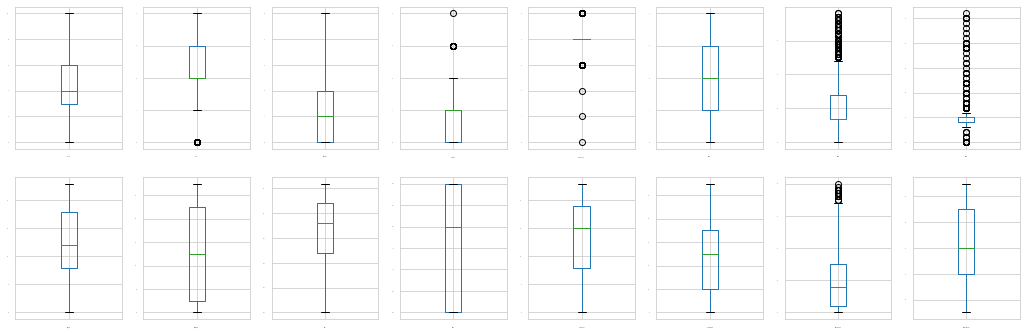

In [165]:
df.plot(kind='box',subplots=True,layout=(4,8),sharex=False,fontsize=1,figsize=(18,12))

Observations :-

1. Airline, Source, Total Stops Additional_Info, Route2, Route3, Duration_Hours and Price have outliers

# Removing Outliers

In [166]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1,1,4,3,7,5,17,30,12,3,4,25,10,55
1,3,3,0,1,4,2,29,3,6,20,5,2,10,20,4,30
2,4,2,1,1,3,3,7,5,19,15,8,2,19,0,23,45
3,6,2,1,1,4,3,7,5,8,0,8,2,21,0,13,30
4,0,0,2,0,4,0,13,5,23,55,9,3,2,45,2,50


In [167]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [168]:
z

array([[0.01190758, 0.03256662, 0.29488167, ..., 0.02633999, 0.02253728,
        1.6969423 ],
       [0.42377921, 0.87708559, 0.97622158, ..., 0.27177067, 0.73775001,
        0.08920717],
       [0.01190758, 0.03256662, 0.29488167, ..., 1.46421332, 1.5270903 ,
        0.98248251],
       ...,
       [0.01190758, 0.03256662, 0.29488167, ..., 0.02633999, 0.49934577,
        0.26802273],
       [1.29515278, 0.03256662, 0.29488167, ..., 0.56988133, 0.57347333,
        1.16089684],
       [0.88328115, 0.03256662, 0.29488167, ..., 0.56988133, 0.45427121,
        0.80366695]])

In [169]:
threshold=3
print(np.where(z>3))

(array([   6,   61,   72,  108,  166,  174,  191,  208,  219,  251,  251,
        251,  251,  284,  291,  292,  295,  299,  312,  367,  484,  510,
        515,  516,  609,  642,  666,  673,  673,  673,  679,  714,  717,
        725,  725,  725,  766,  786,  862,  873,  875,  875,  877,  877,
        905,  950,  954,  966,  966,  987, 1017, 1022, 1086, 1091, 1110,
       1225, 1230, 1243, 1271, 1279, 1370, 1374, 1379, 1479, 1500, 1511,
       1554, 1614, 1631, 1686, 1689, 1689, 1689, 1689, 1756, 1781, 1785,
       1802, 1838, 1861, 1861, 1861, 1889, 1891, 1918, 1923, 1945, 1971,
       1988, 2021, 2026, 2069, 2101, 2114, 2229, 2308, 2309, 2309, 2359,
       2366, 2416, 2422, 2435, 2442, 2442, 2453, 2472, 2487, 2487, 2492,
       2493, 2643, 2660], dtype=int64), array([ 6,  7,  3,  7,  7,  7,  7,  7,  7,  3,  6,  7, 14,  7,  7,  7,  7,
        7,  6,  6,  3, 14,  7,  7,  7,  6,  6,  3,  6,  7,  6,  7,  7,  3,
        6,  7,  7, 14,  6,  7,  3,  7,  3,  7,  7,  7,  4,  6,  7,  7,  7,
    

In [170]:
df_new=df[(z<3).all(axis=1)]

In [171]:
df_new.shape

(2576, 16)

In [172]:

df.shape

(2671, 16)

In [173]:

df=df_new

In [174]:

((10683-10186)/10683)*100


4.652251240288308

In [175]:
# 4% of data is removed as outliers.

# To check Skewness

In [176]:
df.shape

(2576, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002FADA68CE48>,
      dtype=object)

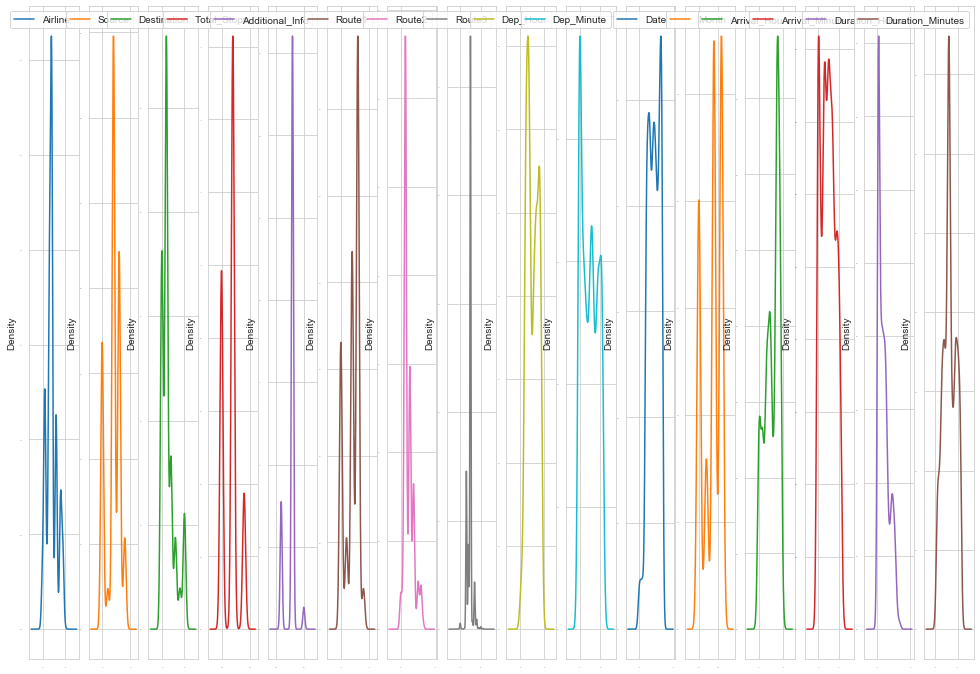

In [177]:
df.plot(kind='density',subplots=True,layout=(1,17),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. Airline, Route2 and Destination are right skewed.
2. Additional_Info and Route1 are left skewed.

In [178]:
df.skew()

Airline             0.461533
Source             -0.441497
Destination         1.291524
Total_Stops         0.216190
Additional_Info    -0.807652
Route1             -0.632192
Route2              1.095758
Route3              0.136142
Dep_Hour            0.062988
Dep_Minute          0.141121
Date               -0.225485
Month              -0.453981
Arrival_Hour       -0.439090
Arrival_Minute      0.116720
Duration_Hours      0.836398
Duration_Minutes   -0.013639
dtype: float64

In [179]:
df_rs=[ 'Destination','Airline','Route2']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [180]:
df.skew()

Airline             0.461533
Source             -0.441497
Destination         0.024366
Total_Stops         0.216190
Additional_Info    -0.807652
Route1             -0.632192
Route2             -0.011421
Route3              0.136142
Dep_Hour            0.062988
Dep_Minute          0.141121
Date               -0.225485
Month              -0.453981
Arrival_Hour       -0.439090
Arrival_Minute      0.116720
Duration_Hours      0.836398
Duration_Minutes   -0.013639
dtype: float64

In [181]:
df_rs=[ 'Additional_Info','Route1']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.cbrt(df[val])

In [182]:
df.skew()

Airline             0.461533
Source             -0.441497
Destination         0.024366
Total_Stops         0.216190
Additional_Info    -0.807652
Route1             -0.632192
Route2             -0.011421
Route3              0.136142
Dep_Hour            0.062988
Dep_Minute          0.141121
Date               -0.225485
Month              -0.453981
Arrival_Hour       -0.439090
Arrival_Minute      0.116720
Duration_Hours      0.836398
Duration_Minutes   -0.013639
dtype: float64

In [183]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date', 'Month',
       'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

# Train Test Split

In [184]:
x=df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes']]


In [185]:
x.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Dep_Hour,Dep_Minute,Date,Month,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,4,2,1.000000,1,4,3,2.645751,5,17,30,12,3,4,25,10,55
1,3,3,0.000000,1,4,2,5.385165,3,6,20,5,2,10,20,4,30
2,4,2,1.000000,1,3,3,2.645751,5,19,15,8,2,19,0,23,45
3,6,2,1.000000,1,4,3,2.645751,5,8,0,8,2,21,0,13,30
4,0,0,1.414214,0,4,0,3.605551,5,23,55,9,3,2,45,2,50


# Scaling of Data

In [186]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [187]:
x

array([[-0.01795035,  0.03328189,  0.05821579, ...,  0.03996649,
         0.03085462,  1.6846222 ],
       [-0.4583322 ,  0.88213487, -1.38065799, ..., -0.25844997,
        -0.72015171, -0.1000409 ],
       [-0.01795035,  0.03328189,  0.05821579, ..., -1.45211581,
         1.658035  ,  0.97075696],
       ...,
       [-0.01795035,  0.03328189,  0.05821579, ...,  0.03996649,
        -0.46981627,  0.25689172],
       [-1.33909592,  0.03328189,  0.05821579, ..., -0.55686643,
         0.65669323, -1.17083876],
       [ 0.86281337,  0.03328189,  0.05821579, ..., -0.55686643,
         0.53152551, -0.81390614]])

In [188]:
x=pd.DataFrame(x)

In [189]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.017950,0.033282,0.058216,0.318444,0.334053,0.829238,-0.548784,0.269020,0.749920,0.275858,1.111268,1.077942,-1.348157,0.039966,0.030855,1.684622
1,-0.458332,0.882135,-1.380658,0.318444,0.334053,-0.005509,2.209370,-1.483184,-1.183280,-0.247997,-1.055278,0.211823,-0.500293,-0.258450,-0.720152,-0.100041
2,-0.017950,0.033282,0.058216,0.318444,-2.017099,0.829238,-0.548784,0.269020,1.101411,-0.509925,-0.126758,0.211823,0.771504,-1.452116,1.658035,0.970757
3,0.862813,0.033282,0.058216,0.318444,0.334053,0.829238,-0.548784,0.269020,-0.831789,-1.295708,-0.126758,0.211823,1.054125,-1.452116,0.406358,-0.100041
4,-1.779478,-1.664424,0.654217,-1.238125,0.334053,-1.675003,0.417582,0.269020,1.804393,1.585495,0.182748,1.077942,-1.630778,1.233632,-0.970487,1.327690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,-1.339096,0.882135,-1.380658,0.318444,0.334053,-0.005509,0.554620,-1.483184,1.277156,0.275858,1.111268,1.077942,0.912814,0.039966,1.658035,1.684622
2572,-0.458332,0.882135,-1.380658,-1.238125,0.334053,-0.005509,-0.961270,0.269020,0.222684,-0.247997,0.492255,-1.520416,0.347572,1.830465,-0.970487,0.256892
2573,-0.017950,0.033282,0.058216,0.318444,0.334053,0.829238,-0.548784,0.269020,1.452902,1.323568,1.111268,-1.520416,-1.348157,0.039966,-0.469816,0.256892
2574,-1.339096,0.033282,0.058216,0.318444,0.334053,0.829238,-0.548784,0.269020,-1.534771,-1.295708,1.111268,-1.520416,0.771504,-0.556866,0.656693,-1.170839


In [190]:
x.columns=['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
        'Route1', 'Route2', 'Route3', 'Dep_Hour', 'Dep_Minute', 'Date',
       'Month', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes']

In [191]:
rf=RandomForestRegressor(max_depth= 100, max_features='auto', min_samples_leaf= 1)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9304896231676937
error:
Mean absolute error: 560.2030433108093
Mean squared error: 1174698.1117636636
Root Mean squared error: 1083.834909828828


# Saving the model

In [204]:
import joblib
joblib.dump(rf,"rf_flight_price.obj")

['rf_flight_price.obj']

In [205]:
a=joblib.load("rf_flight_price.obj")

In [206]:
pred=a.predict(df)

In [207]:
df_2=pd.DataFrame(pred)
df_2.to_csv('flight_price.csv')